#### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)


In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("baseball.csv")
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Understanding Dataset

There are 17 columns in the dataset namely:
    
    W R AB H 2B 3B HR BB SO SB RA ER ERA CG SHO SV E
    
w= Win: number of games where pitcher was pitching while their team took the lead and went on to win,
    
R=  Runs scored: times reached home plate legally and safely
    
AB=  At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
    
H= Hit: reaching base because of a batted, fair ball without error by the defense

2B= Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B= Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
HR= Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error 

BB= Base on balls : hitter not swinging at four pitches called out of the strike zone and awarded first base.

SO= strikeout: number of times a batter strikes out to their plate appearance

SB= Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA=  Run average: number of runs allowed times nine divided by innings pitched
    
ER= Earned run: number of runs that did not occur as a result of errors or passed balls
    
ERA = Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG=  Complete game: number of games where player was the only pitcher for their team
    
SHO= Shutout: number of complete games pitched with no runs allowed
    
SV= Save: number of games where the pitcher enters a game led by the pitcher's team,
    finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E= E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

## Data Visualization

<AxesSubplot:>

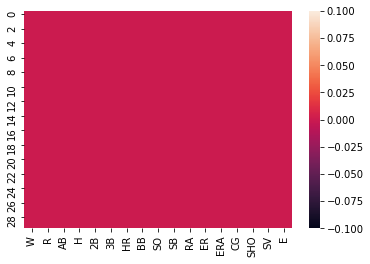

In [9]:
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Frequency'>

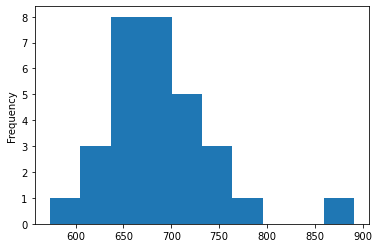

In [10]:
df["R"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

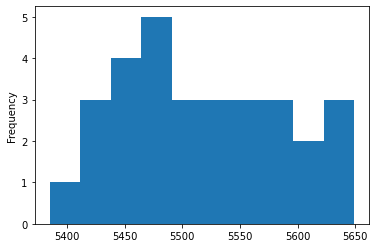

In [11]:
df["AB"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

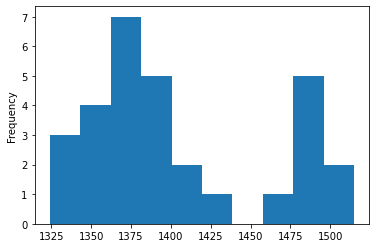

In [12]:
df["H"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

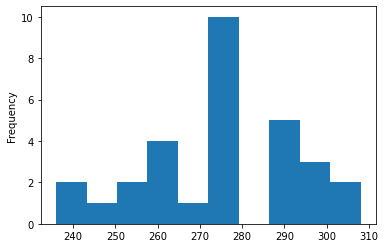

In [13]:
df["2B"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

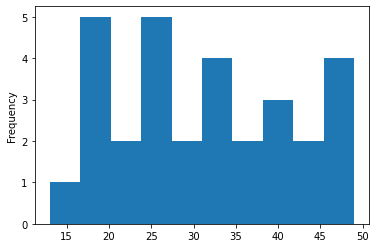

In [14]:
df["3B"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

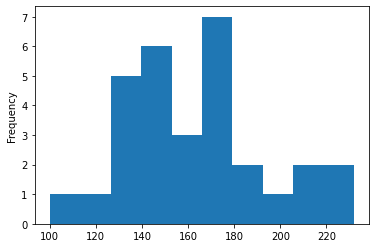

In [15]:
df["HR"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

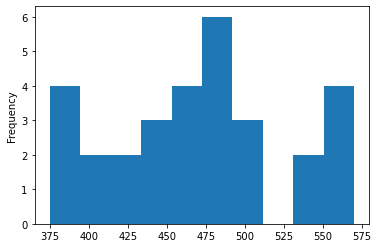

In [16]:
df["BB"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

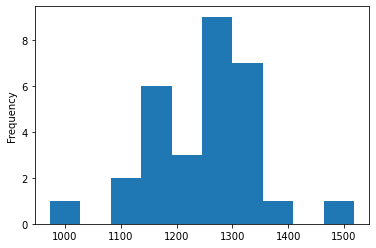

In [17]:
df["SO"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

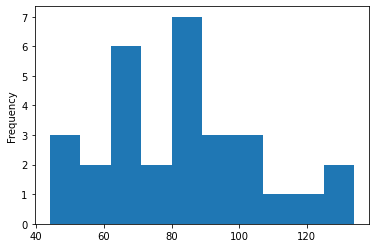

In [18]:
df["SB"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

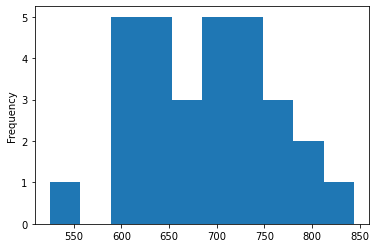

In [19]:
df["RA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

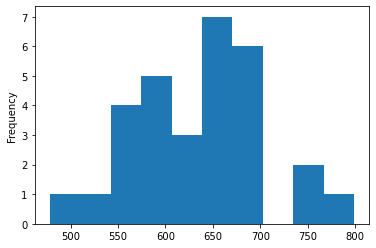

In [20]:
df["ER"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

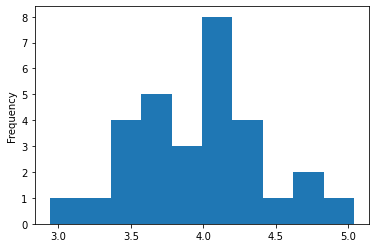

In [21]:
df["ERA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

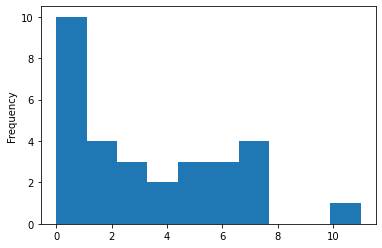

In [22]:
df["CG"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

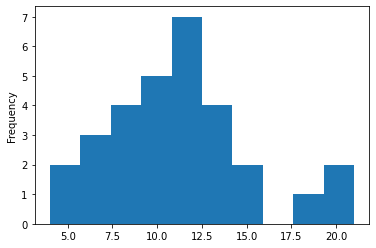

In [23]:
df["SHO"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

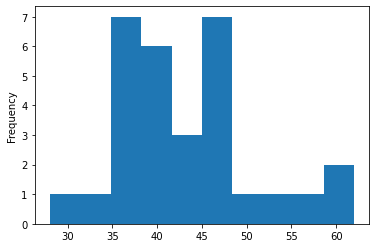

In [24]:
df["SV"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

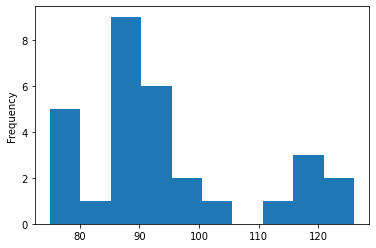

In [25]:
df["E"].plot.hist()

<function matplotlib.pyplot.show(close=None, block=None)>

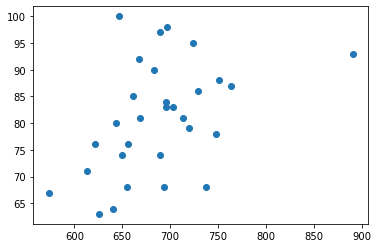

In [26]:
plt.scatter(data = df,x = "R",y = "W")
plt.show

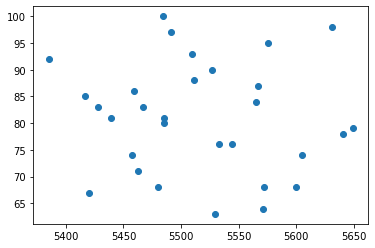

In [27]:
plt.scatter(data = df,x = "AB",y = "W")
plt.show()

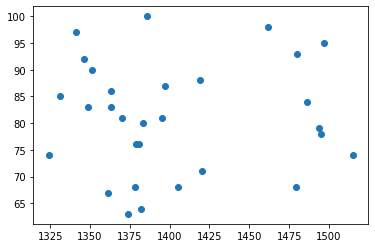

In [28]:
plt.scatter(data = df,x = "H",y = "W")
plt.show()

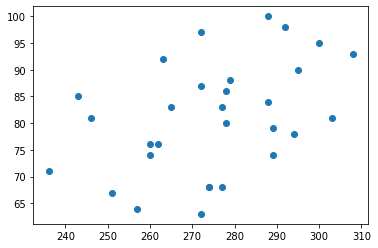

In [29]:
plt.scatter(data = df,x = "2B",y = "W")
plt.show()

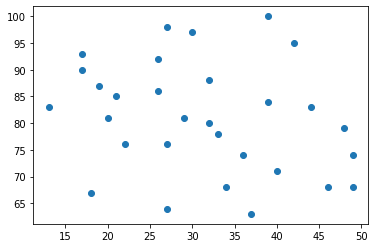

In [30]:
plt.scatter(data = df,x = "3B",y = "W")
plt.show()

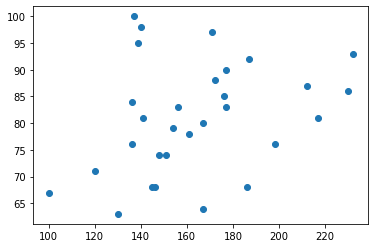

In [31]:
plt.scatter(data = df,x = "HR",y = "W")
plt.show()

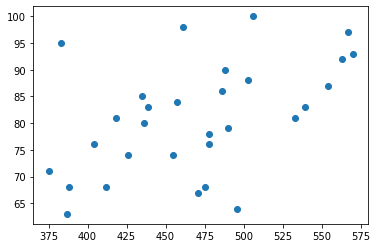

In [32]:
plt.scatter(data = df,x = "BB",y = "W")
plt.show()

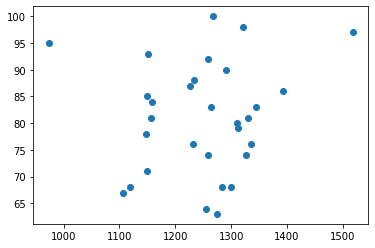

In [33]:
plt.scatter(data = df,x = "SO",y = "W")
plt.show()

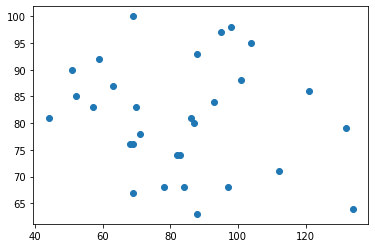

In [34]:
plt.scatter(data = df,x = "SB",y = "W")
plt.show()

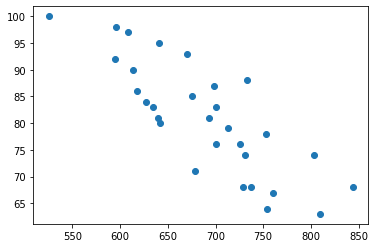

In [35]:
plt.scatter(data = df,x = "RA",y = "W")
plt.show()

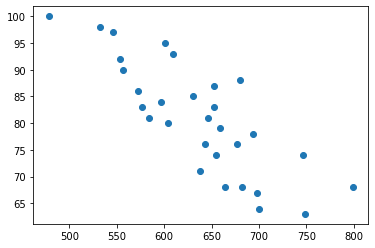

In [36]:
plt.scatter(data = df,x = "ER",y = "W")
plt.show()

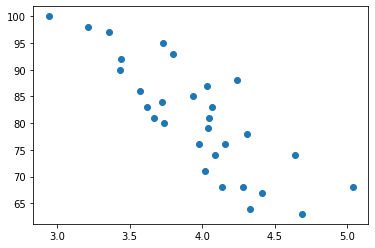

In [37]:
plt.scatter(data = df,x = "ERA",y = "W")
plt.show()

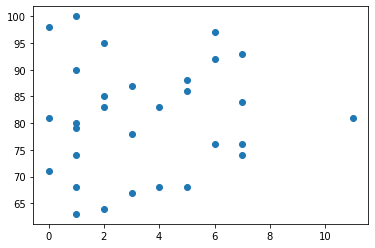

In [38]:
plt.scatter(data = df,x = "CG",y = "W")
plt.show()

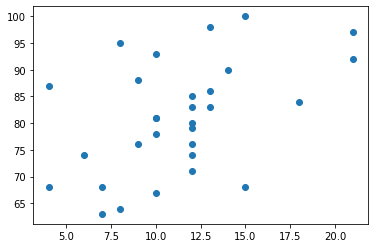

In [39]:
plt.scatter(data = df,x = "SHO",y = "W")
plt.show()

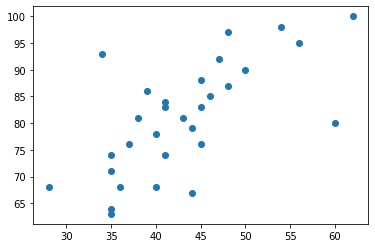

In [40]:
plt.scatter(data = df,x = "SV",y = "W")
plt.show()

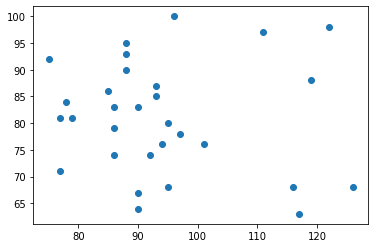

In [41]:
plt.scatter(data = df,x = "E",y = "W")
plt.show()

<AxesSubplot:xlabel='R', ylabel='W'>

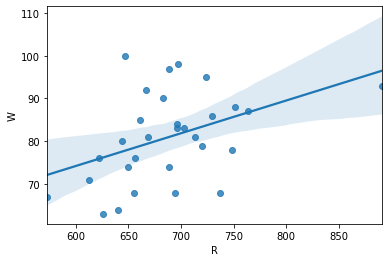

In [42]:
sns.regplot(data = df,x = "R",y="W")

<AxesSubplot:xlabel='AB', ylabel='W'>

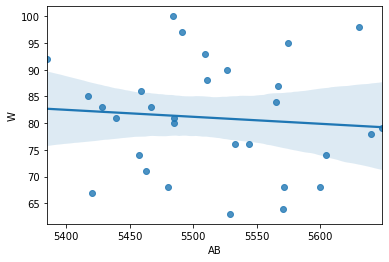

In [43]:
sns.regplot(data = df,x = "AB",y="W")

<AxesSubplot:xlabel='H', ylabel='W'>

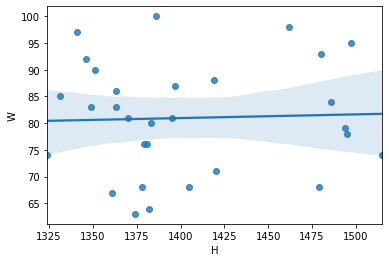

In [44]:
sns.regplot(data = df,x = "H",y="W")

<AxesSubplot:xlabel='2B', ylabel='W'>

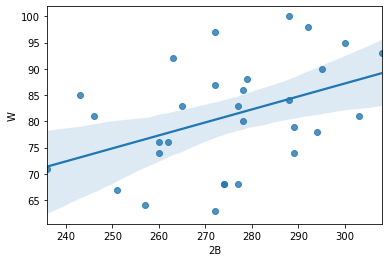

In [45]:
sns.regplot(data = df,x = "2B",y="W")

<AxesSubplot:xlabel='3B', ylabel='W'>

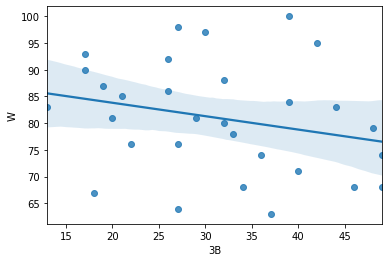

In [46]:
sns.regplot(data = df,x = "3B",y="W")

<AxesSubplot:xlabel='HR', ylabel='W'>

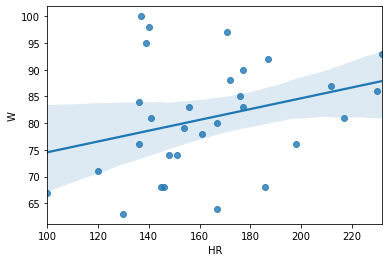

In [47]:
sns.regplot(data = df,x = "HR",y="W")

<AxesSubplot:xlabel='BB', ylabel='W'>

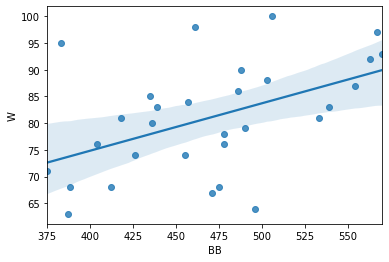

In [48]:
sns.regplot(data = df,x = "BB",y="W")

<AxesSubplot:xlabel='SO', ylabel='W'>

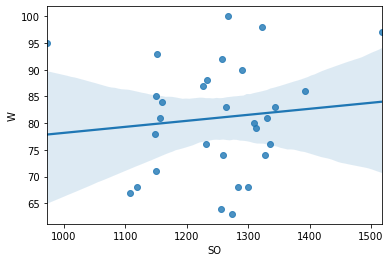

In [49]:
sns.regplot(data = df,x = "SO",y="W")

<AxesSubplot:xlabel='SB', ylabel='W'>

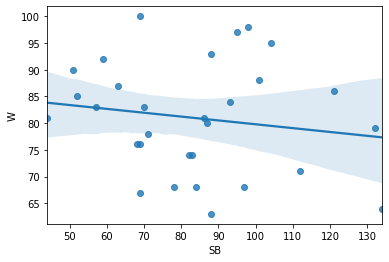

In [50]:
sns.regplot(data = df,x = "SB",y="W")

<AxesSubplot:xlabel='RA', ylabel='W'>

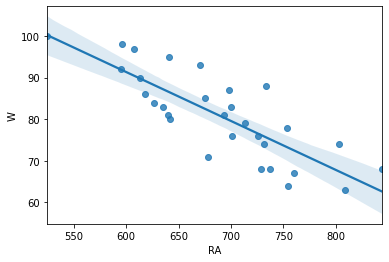

In [51]:
sns.regplot(data = df,x = "RA",y="W")

<AxesSubplot:xlabel='ER', ylabel='W'>

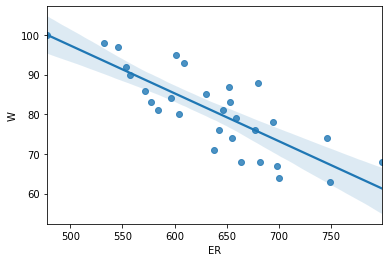

In [52]:
sns.regplot(data = df,x = "ER",y="W")

<AxesSubplot:xlabel='ERA', ylabel='W'>

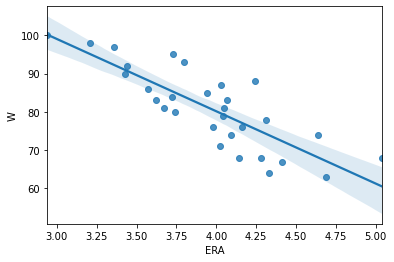

In [53]:
sns.regplot(data = df,x = "ERA",y="W")

<AxesSubplot:xlabel='CG', ylabel='W'>

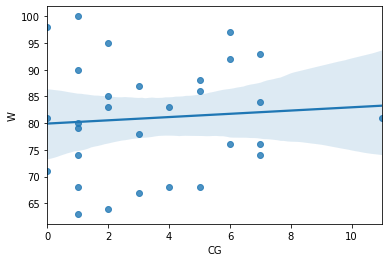

In [54]:
sns.regplot(data = df,x = "CG",y="W")

<AxesSubplot:xlabel='SHO', ylabel='W'>

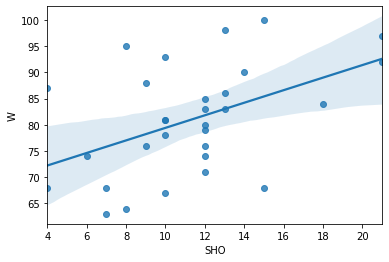

In [55]:
sns.regplot(data = df,x = "SHO",y="W")

<AxesSubplot:xlabel='SV', ylabel='W'>

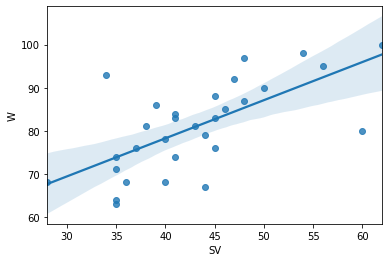

In [56]:
sns.regplot(data = df,x = "SV",y="W")

<AxesSubplot:xlabel='E', ylabel='W'>

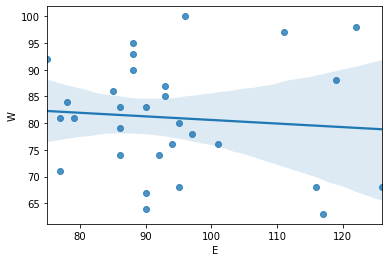

In [57]:
sns.regplot(data = df,x = "E",y="W")

<AxesSubplot:xlabel='R', ylabel='Density'>

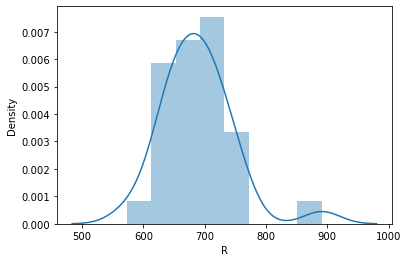

In [58]:
sns.distplot(df["R"])

<AxesSubplot:xlabel='AB', ylabel='Density'>

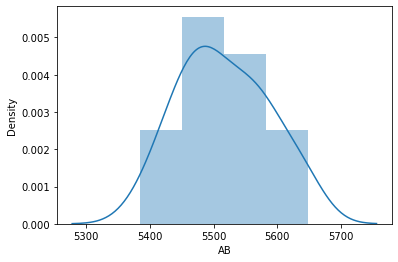

In [59]:
sns.distplot(df["AB"])

<AxesSubplot:xlabel='H', ylabel='Density'>

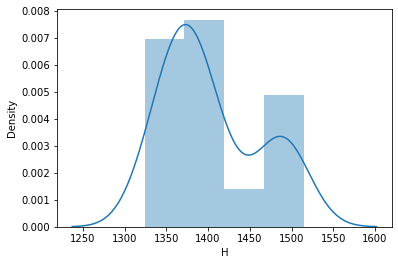

In [60]:
sns.distplot(df["H"])

<AxesSubplot:xlabel='2B', ylabel='Density'>

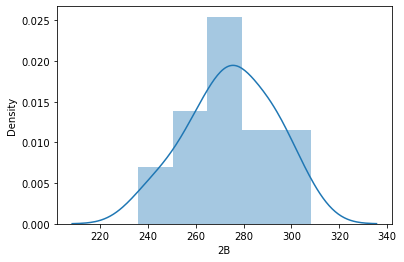

In [61]:
sns.distplot(df["2B"])

<AxesSubplot:xlabel='3B', ylabel='Density'>

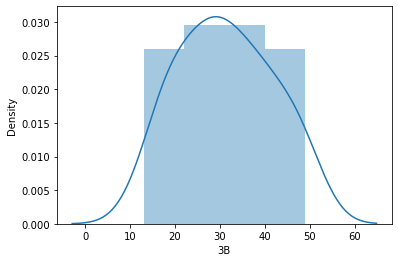

In [62]:
sns.distplot(df["3B"])

<AxesSubplot:xlabel='HR', ylabel='Density'>

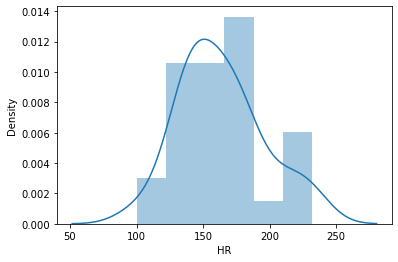

In [63]:
sns.distplot(df["HR"])

<AxesSubplot:xlabel='BB', ylabel='Density'>

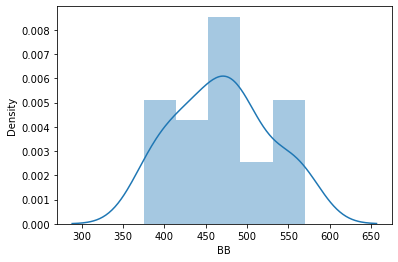

In [64]:
sns.distplot(df["BB"])

<AxesSubplot:xlabel='SO', ylabel='Density'>

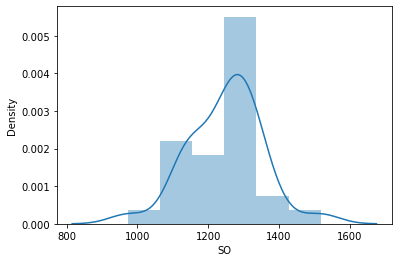

In [65]:
sns.distplot(df["SO"])

<AxesSubplot:xlabel='SB', ylabel='Density'>

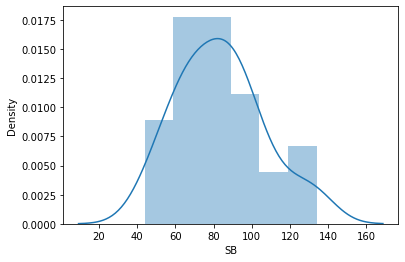

In [66]:
sns.distplot(df["SB"])

<AxesSubplot:xlabel='RA', ylabel='Density'>

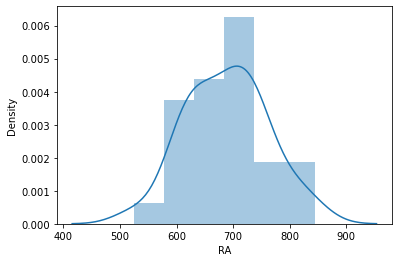

In [67]:
sns.distplot(df["RA"])

<AxesSubplot:xlabel='ER', ylabel='Density'>

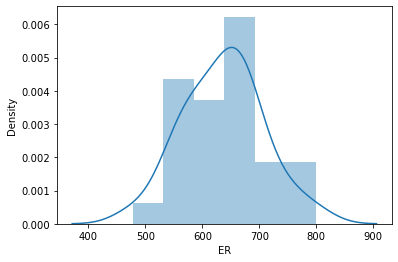

In [68]:
sns.distplot(df["ER"])

<AxesSubplot:xlabel='CG', ylabel='Density'>

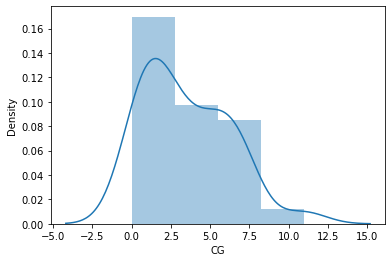

In [69]:
sns.distplot(df["CG"])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

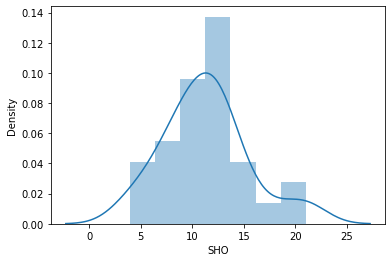

In [70]:
sns.distplot(df["SHO"])

<AxesSubplot:xlabel='SV', ylabel='Density'>

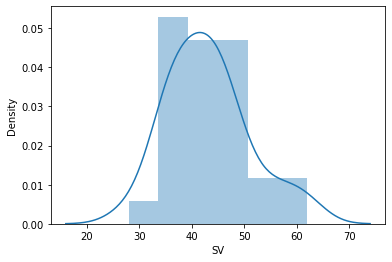

In [71]:
sns.distplot(df["SV"])

In [72]:
corr = df.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

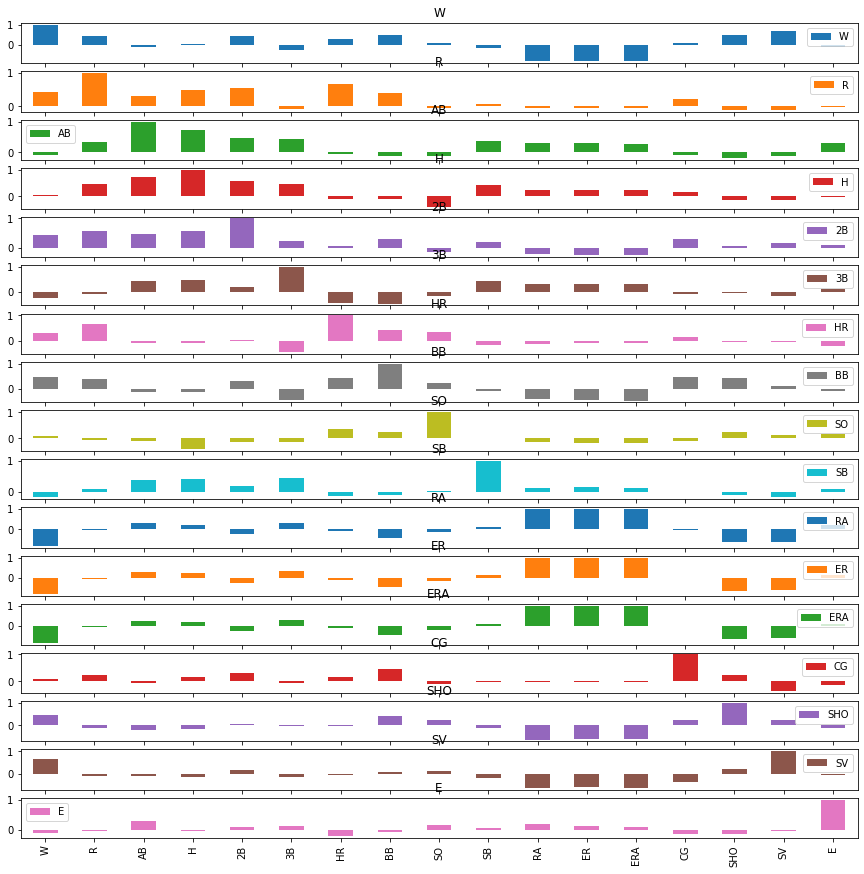

In [73]:
corr.plot(kind = "bar",subplots = True,figsize = (15,15))

<AxesSubplot:>

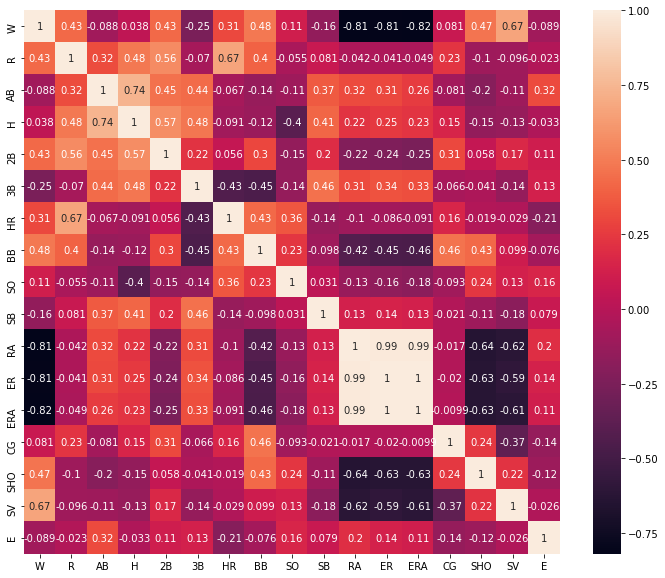

In [74]:
corr_map = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_map,annot = True)

### Correlation Outcome
some of the columns in datasets are postively and some are negatively correlated.and some columns are also multicolinear to each other. R has 43 percent correlation with target column W which can be considered has good bond.R has 43 percent correlation with target column W which can be considered has good bond.AB has -88 percent correlation with target column W which can be considered has weak bond.H has 38 percent correlation with target column W which can be considered has good bond. 2B has 43 percent correlation with target column W which can be considered has good bond.3B has -25 percent correlation with target column W which can be considered has weak bond.HR has 31 percent correlation with target column W which can be considered has good bond.BB has 48 percent correlation with target column W which can be considered has good bond.SO has 11 percent correlation with target column W which can be considered has weak bond.SB has -16 percent correlation with target column W which can be considered has weak bond.RA has -81 percent correlation with target column W which can be considered has weak bond.ER has -81 percent correlation with target column W which can be considered has weak bond.ERA has -82 percent correlation with target column W which can be considered has weak bond.CG has 81 percent correlation with target column W which can be considered has strong bond.SHO has 47 percent correlation with target column W which can be considered has good bond.SV has 67 percent correlation with target column W which can be considered has strong bond.E has -87 percent correlation with target column W which can be considered has weak bond.

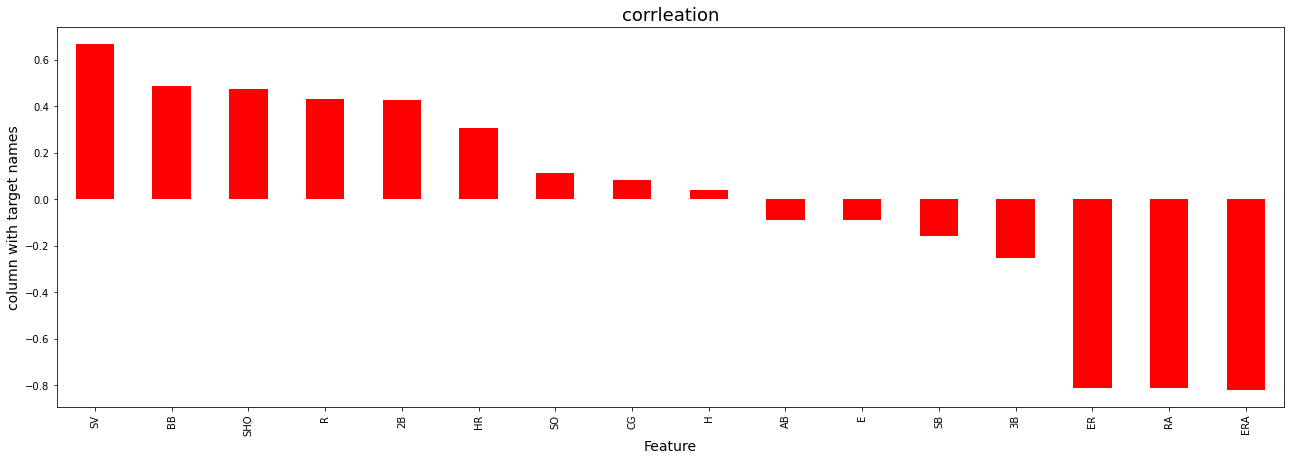

In [75]:
plt.figure(figsize = (22,7))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar',color = 'r')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel("column with target names", fontsize  = 14)
plt.title("corrleation",fontsize =18)
plt.show()

### Plotting the outliers

In [76]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

W         AxesSubplot(0.125,0.125;0.0383663x0.755)
R       AxesSubplot(0.17104,0.125;0.0383663x0.755)
AB     AxesSubplot(0.217079,0.125;0.0383663x0.755)
H      AxesSubplot(0.263119,0.125;0.0383663x0.755)
2B     AxesSubplot(0.309158,0.125;0.0383663x0.755)
3B     AxesSubplot(0.355198,0.125;0.0383663x0.755)
HR     AxesSubplot(0.401238,0.125;0.0383663x0.755)
BB     AxesSubplot(0.447277,0.125;0.0383663x0.755)
SO     AxesSubplot(0.493317,0.125;0.0383663x0.755)
SB     AxesSubplot(0.539356,0.125;0.0383663x0.755)
RA     AxesSubplot(0.585396,0.125;0.0383663x0.755)
ER     AxesSubplot(0.631436,0.125;0.0383663x0.755)
ERA    AxesSubplot(0.677475,0.125;0.0383663x0.755)
CG     AxesSubplot(0.723515,0.125;0.0383663x0.755)
SHO    AxesSubplot(0.769554,0.125;0.0383663x0.755)
SV     AxesSubplot(0.815594,0.125;0.0383663x0.755)
E      AxesSubplot(0.861634,0.125;0.0383663x0.755)
dtype: object

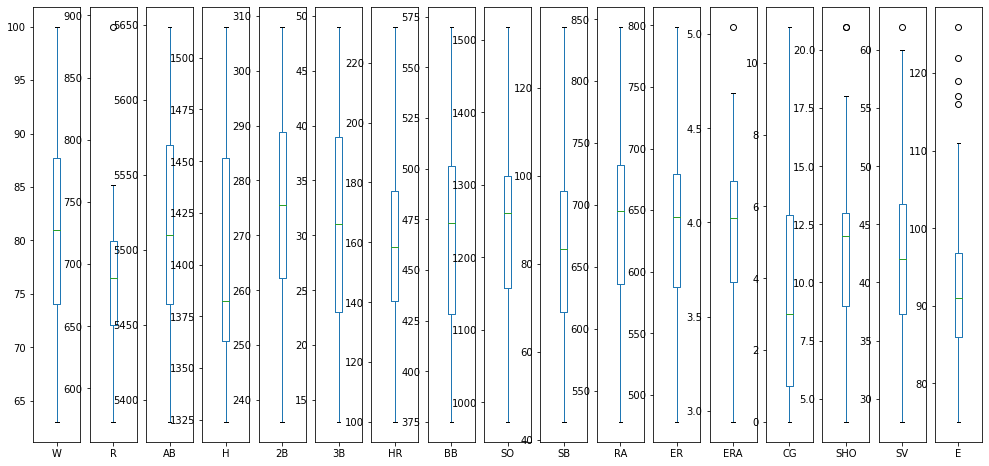

In [77]:
df.plot(kind = 'box',subplots = True,figsize = (17,8))

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [80]:
valcal()

      vif factor features
0    1164.543214        W
1    3253.807721        R
2    5181.779465       AB
3    4817.334228        H
4    1157.105781       2B
5      32.435486       3B
6     309.301103       HR
7     302.099558       BB
8     400.292880       SO
9      28.665516       SB
10  18170.014649       RA
11  51175.790270       ER
12  23668.747242      ERA
13     10.411616       CG
14     33.258426      SHO
15    331.282416       SV
16     96.958680        E


In [81]:
df.shape

(30, 17)

### Removing Outliers 

In [82]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [83]:
thresold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [84]:
df_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [85]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

### Percentage of loss

In [86]:
df=df_new

In [87]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

AS VIF of 
ER=51175
ERA=23668

so we will drop this columns.

In [88]:
df=df.drop(['ER','ERA'],axis=1)

In [89]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [90]:
s=['R','CG','SHO','SV']

for i in s:
    df[i]=np.sqrt(df[i])

In [91]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,26.907248,5575,1497,300,42,139,383,973,104,641,1.414214,2.828427,7.483315,88
1,83,26.381812,5467,1349,277,44,156,439,1264,70,700,1.414214,3.464102,6.708204,86
2,81,25.865034,5439,1395,303,29,141,533,1157,86,640,3.316625,3.162278,6.164414,79
3,76,24.939928,5533,1381,260,27,136,404,1231,68,701,2.645751,3.000000,6.082763,101
4,74,26.248809,5605,1515,289,49,151,455,1259,83,803,2.645751,3.464102,5.916080,86


In [92]:
x = df.iloc[:,-15:]
y = df.iloc[:,-15]

In [93]:
x.shape

(29, 15)

In [94]:
y.shape

(29,)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.41602548,  0.95651645,  0.83008422,  1.73830631,  1.55653766,
         1.01084549, -0.76586314, -1.53635899, -2.72762331,  0.9059529 ,
        -0.66451353, -0.25354897, -0.77743601,  1.60263096, -0.47109143],
       [ 0.23994704,  0.34416795, -0.70283074, -0.93869788,  0.20117132,
         1.20891656, -0.18138864, -0.49502051,  0.12189552, -0.58531515,
         0.15463823, -0.25354897,  0.24747497,  0.25562074, -0.61489829],
       [ 0.04393396, -0.25808975, -1.10025314, -0.10665604,  1.73332457,
        -0.2766165 , -0.69710144,  1.25294051, -0.9258657 ,  0.11645805,
        -0.67839746,  2.02046293, -0.23916196, -0.68939326, -1.1182223 ],
       [-0.44609872, -1.33621796,  0.23395062, -0.35988616, -0.8006212 ,
        -0.47468758, -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,
         0.16852216,  1.21854679, -0.50080556, -0.83128957,  0.46365315],
       [-0.64211179,  0.18916563,  1.25589393,  2.0638879 ,  0.90831897,
         1.70409425, -0.35329291, -0.19749523, 

In [96]:
lr = LinearRegression()
lr

LinearRegression()

In [97]:
for i in range(0,15000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 0  The model performs very well
At random_state:- 0
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 1  The model performs very well
At random_state:- 1
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 2  The model performs very well
At random_state:- 2
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 3  The model performs very well
At random_state:- 3
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 4  The model performs very well
At random_state:- 4
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 5  The model performs very well
At random_state:- 5
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 6  The model performs very well
At random_state:- 6
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 7  The model performs very well
At random_state:- 7
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=201,test_size=0.20)

In [99]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [100]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [101]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [102]:
fun(lr)

Taining Score:- 100.0
Mean Absolute Error 1.4210854715202004e-14
Mean Squared Error 3.365806528942984e-28
Root Mean Squared Erro 1.8346134549116834e-14
R2 Score 100.0


In [103]:
fun(svr)

Taining Score:- 28.33677853610881
Mean Absolute Error 4.965176250933236
Mean Squared Error 47.16647768835862
Root Mean Squared Erro 6.867785501044614
R2 Score 16.478445805169184


In [104]:
fun(svrl)

Taining Score:- 99.34514689272612
Mean Absolute Error 2.1100191759800353
Mean Squared Error 7.789295454273809
Root Mean Squared Erro 2.7909309296852562
R2 Score 86.20685507359286


In [105]:
fun(svrp)

Taining Score:- 40.37991306865389
Mean Absolute Error 4.75904475500892
Mean Squared Error 42.311775425842136
Root Mean Squared Erro 6.504750220096244
R2 Score 25.075065650254935


In [106]:
fun(dtc)

Taining Score:- 100.0
Mean Absolute Error 1.5
Mean Squared Error 3.8333333333333335
Root Mean Squared Erro 1.9578900207451218
R2 Score 93.21200196753566


In [107]:
fun(knn)

Taining Score:- 82.96390396049253
Mean Absolute Error 4.599999999999999
Mean Squared Error 22.78666666666666
Root Mean Squared Erro 4.773538170651478
R2 Score 59.64977865223808


### Ensemble Method

In [108]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [109]:
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gfr=GradientBoostingRegressor()

In [110]:
fun(rfr)

Taining Score:- 99.26306442704441
Mean Absolute Error 0.9433333333333328
Mean Squared Error 1.1438999999999988
Root Mean Squared Erro 1.0695326081985528
R2 Score 97.9744023610428


In [111]:
fun(adr)

Taining Score:- 99.78466378591465
Mean Absolute Error 1.2055555555555557
Mean Squared Error 2.2683333333333384
Root Mean Squared Erro 1.5060987130109826
R2 Score 95.98327594687652


In [112]:
fun(gfr)

Taining Score:- 99.99999989169108
Mean Absolute Error 0.8354586579222717
Mean Squared Error 0.8550382195724255
Root Mean Squared Erro 0.9246827669922402
R2 Score 98.48591362987666


### Regularization

In [113]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [114]:
ls = Lasso()
ri = Ridge()
en = ElasticNet()

In [115]:
fun(ls)

Taining Score:- 99.23116657100456
Mean Absolute Error 0.4822573091940849
Mean Squared Error 0.4404853577899564
Root Mean Squared Erro 0.6636907094347159
R2 Score 99.21999641512846


In [116]:
fun(ri)

Taining Score:- 99.46693490206191
Mean Absolute Error 2.2733738390509948
Mean Squared Error 7.881473634613375
Root Mean Squared Erro 2.8073962375506194
R2 Score 86.04362760225865


In [117]:
fun(en)

Taining Score:- 94.36738474625407
Mean Absolute Error 2.8174867607946794
Mean Squared Error 13.222203802809977
Root Mean Squared Erro 3.636234838787228
R2 Score 76.5863582439174


### HyperTuning For Best Score

In [118]:
l1 = {'n_jobs':[1,2,3,4,5],'copy_X':['True','False'],'fit_intercept':['True','False'],'positive':['True','False']}

In [119]:
g1 = GridSearchCV(lr,l1)
g1.fit(x,y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'positive': ['True', 'False']})

In [120]:
lr1 = LinearRegression(copy_X = True,fit_intercept = True,n_jobs = 1)

In [121]:
fun(lr1)

Taining Score:- 100.0
Mean Absolute Error 1.4210854715202004e-14
Mean Squared Error 3.365806528942984e-28
Root Mean Squared Erro 1.8346134549116834e-14
R2 Score 100.0


In [127]:
p2={'alpha':[10,1,0.1,0.001,0.0001,0.00001],'fit_intercept':['True','False'],'copy_X':['True','False']
    ,'max_iter':[10,50,75,100,250,500,1000,3000,5000,10000],
    'selection':['cyclic','random'],'positive':['True','False']}

In [128]:
g2=GridSearchCV(ls,p2)
g2.fit(x,y)
print(g2.best_params_)

{'alpha': 1e-05, 'copy_X': 'True', 'fit_intercept': 'True', 'max_iter': 10, 'positive': 'True', 'selection': 'cyclic'}


In [130]:
ls1 = Lasso(alpha = 0.001,copy_X = False,max_iter = 5,fit_intercept = True)

In [131]:
fun(ls1)

Taining Score:- 99.99999923116657
Mean Absolute Error 0.00048225730919426724
Mean Squared Error 4.4048535778810374e-07
Root Mean Squared Erro 0.0006636907094333201
R2 Score 99.99999921999641


In [133]:
p3={'alpha':[10,1,0.1,0.01,0.001,0.0001],'fit_intercept':['True','False'],'copy_X':['True','False'],
    'max_iter':[5,10,50,75,100,250,500]}

In [134]:
g3 = GridSearchCV(ri,p3)
g3.fit(x,y)
print(g3.best_params_)

{'alpha': 0.0001, 'copy_X': 'True', 'fit_intercept': 'True', 'max_iter': 5}


In [135]:
ri1 = Ridge(alpha = 0.0001,copy_X = True,max_iter = 5)

In [136]:
fun(ri1)

Taining Score:- 99.99999995118176
Mean Absolute Error 0.0007092381532061154
Mean Squared Error 7.81960473788317e-07
Root Mean Squared Erro 0.0008842852898178941
R2 Score 99.9999986153184


### Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score

In [139]:
score = cross_val_score(ls1,x,y,cv = 3)
print("At value of cv = 3 score is :",score.mean())

At value of cv = 3 score is : 0.9999999836848161


In [142]:
score = cross_val_score(lr1,x,y,cv = 5)
print("At value of cv = 5 score is :",score.mean())

At value of cv = 5 score is : 1.0


In [143]:
score = cross_val_score(knn,x,y,cv = 6)
print("At value of cv = 6 score is :",score.mean())

At value of cv = 6 score is : 0.2716040490738786


In [144]:
score = cross_val_score(ri,x,y,cv = 4)
print("At value of cv = 4 score is :",score.mean())

At value of cv = 4 score is : 0.9216712467907591


In [145]:
score = cross_val_score(svrl,x,y,cv = 3)
print("At value of cv = 3 score is :",score.mean())

At value of cv = 3 score is : 0.8425506781210318


In [146]:
score = cross_val_score(ri1,x,y,cv = 5)
print("At value of cv = 5 score is :",score.mean())

At value of cv = 5 score is : 0.9999999937933544


### Model Solving

In [147]:
import pickle
file_name = 'Base ball_prediction.plk'
pickle.dump(ri1,open(file_name,'wb'))

### Conclusion

    Actual    Predict
13      76  76.000773
7       81  81.000116
23      67  67.000847
25      92  92.000130
8       80  80.001690
21      83  83.000699


Text(0.5, 1.0, 'RIDGE Regressor')

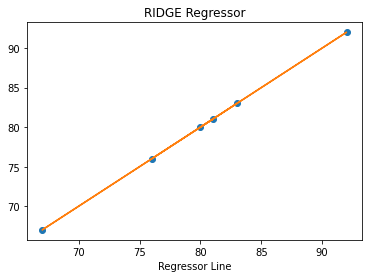

In [148]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=ri1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(ls1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('RIDGE Regressor')